In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

# Load the diabetes dataset (Note: standardized)
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],columns= diabetes['feature_names'] + ['target'])
print("Note: bmi = body mass index, bp = average_blood_pressure, s1 = total serum cholesterol, s2 = low-density lipoproteins, s3 = high-density lipoproteins, s4 = total cholesterol, s5 = log of serum triglycerides level, s6 = disease_progression, target = quantitative measure of disease progression one year after baseline")
df.head()

Note: bmi = body mass index, bp = average_blood_pressure, s1 = total serum cholesterol, s2 = low-density lipoproteins, s3 = high-density lipoproteins, s4 = total cholesterol, s5 = log of serum triglycerides level, s6 = disease_progression, target = quantitative measure of disease progression one year after baseline


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


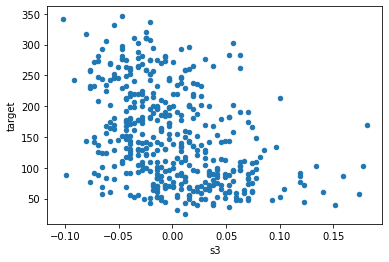

In [2]:
# scatter plots
ax=df.plot.scatter('s3', 'target')

In [5]:
# Nonlinear regression
result = sm.ols(formula='target~s3+I(s3**2)', data=df).fit()
print(result.summary())
print('MSE = %f' %(result.mse_model))

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     42.28
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           1.62e-17
Time:                        09:03:59   Log-Likelihood:                -2508.2
No. Observations:                 442   AIC:                             5022.
Df Residuals:                     439   BIC:                             5035.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    148.3362      4.025     36.851      0.0

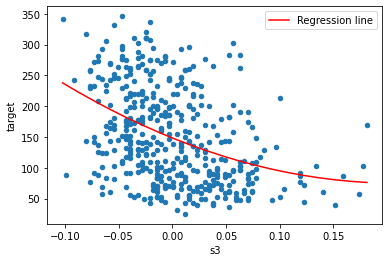

In [6]:
# Plot regression line
ax=df.plot.scatter('s3', 'target')
value_min = df['s3'].min()
value_max = df['s3'].max()
pred_input = np.linspace(value_min, value_max, 20)

b0=result.params[0]
b1=result.params[1]
b2=result.params[2]
df_line = pd.DataFrame(data= np.c_[b0+b1*pred_input+b2*pred_input*pred_input], index=pred_input, columns= ['Regression line'])
ax=df_line.plot.line(color='red', ax=ax)